In [287]:
from __future__ import division
import os
import pymongo as pm ## first establish ssh tunnel to server where database is running
import base64
import numpy as np
from numpy import *
import PIL
from PIL import Image, ImageOps
import base64
import matplotlib
%matplotlib inline
from matplotlib import pylab, mlab, pyplot
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
from matplotlib.path import Path
import matplotlib.patches as patches
import cv2
import pandas as pd
from svgpathtools import parse_path
import svg_distance_helpers as rsh
import svg_render_helpers as rrh

#### directory and file hierarchy

In [288]:
# directory & file hierarchy
analysis_dir = os.getcwd()
ref_dir = os.path.join(analysis_dir, 'reference')
data_dir = os.path.join(analysis_dir,'tracing')

### read in tracing and reference data

In [291]:
reload(rsh)

<module 'svg_distance_helpers' from 'svg_distance_helpers.py'>

In [303]:
reload(rsh)
# read in tracing data
fpath = os.path.join(data_dir, 'test40.png')
tra = rsh.load_preprocess_tracing(fpath, threshold = 150, img_size = 100, invert=True)
print 'Number of pixels marked in the tracing = {}'.format(np.sum(tra==255))

# read in reference data
fpath = os.path.join(ref_dir, 'square_50.png')
ref = rsh.load_preprocess_tracing(fpath, threshold = 50, img_size = 100, invert=False)
print 'Number of pixels marked in the reference = {}'.format(np.sum(ref==255))

Number of pixels marked in the tracing = 205
Number of pixels marked in the reference = 332


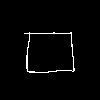

In [309]:
Image.fromarray(tra)

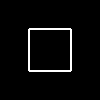

In [310]:
Image.fromarray(ref)

### apply transform and minimize KL between tracing and reference

In [91]:
reload(rsh)
loss, final_draw, product, weights, bias = rsh.minimize_error_soft_index(img_ref, img_ref)
print('Loss: {}   Weights:  {}   Bias: {}'.format(loss, weights, bias))

epoch 0, loss -0.0346867255867
epoch 100, loss -0.0346713513136
epoch 200, loss -0.0346637070179
epoch 300, loss -0.034676592797
epoch 400, loss -0.0346776284277
epoch 500, loss -0.0346779488027
epoch 600, loss -0.0346665009856
epoch 700, loss -0.0346774198115
epoch 800, loss -0.0346652790904
epoch 900, loss -0.0346713028848
Loss: -0.0346756875515   Weights:  Parameter containing:
tensor([[ 0.9993,  0.0014],
        [ 0.0007,  0.9990]])   Bias: Parameter containing:
tensor(1.00000e-04 *
       [ 0.4580,  1.2074])


In [73]:
xform_tracing_array = product.data.numpy()
xform_tracing_255 = np.uint8(np.round(xform_tracing_array)*255)
xform_tracing_im = Image.fromarray(xform_tracing_255)

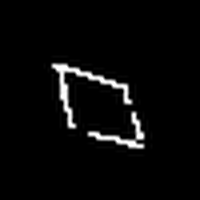

In [75]:
xform_tracing_im.resize((200,200),Image.ANTIALIAS)

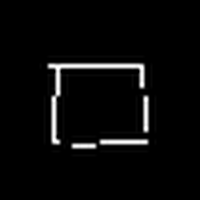

In [82]:
orig_tracing_im = Image.fromarray(np.uint8(img_draw*255))
orig_tracing_im.resize((200,200),Image.ANTIALIAS)

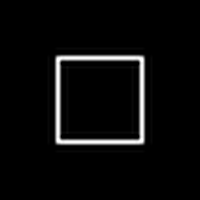

In [85]:
orig_ref_im = Image.fromarray(np.uint8(img_ref*255))
orig_ref_im.resize((200,200),Image.ANTIALIAS)

In [ ]:
# reload(rsh)
# # ref = np.array([[0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1]])
# # draw = np.array([[0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1]])

# ref = np.array([[0,0,1],[0,0,1],[0,0,0]])
# draw = np.array([[0,1,0],[0,1,0],[0,0,0]])

# loss, final_draw, product, weights, bias = rsh.minimize_error_soft_index(ref, draw)
# print weights
# print bias
# print product.long()
# print final_draw

In [ ]:
kl = nn.KLDivLoss()
loss = kl(product, img_ref) * 100